## Chi-square

Compute chi-squared test between categorical features and classification target.

$$X^2 = \sum_{}^{}\frac{(observed — expected)^2}{expected}$$

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
variables = ['pclass', 'survived', 'sex', 'sibsp', 'parch', 'embarked']

data = pd.read_csv("../Data/titanic.csv", usecols=variables)

data.head()

,pclass,survived,sex,sibsp,parch,embarked
0,1,1,female,0,0,S
1,1,1,male,1,2,S
2,1,0,female,1,2,S
3,1,0,male,1,2,S
4,1,0,female,1,2,S


In [3]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("survived", axis=1),
    data['survived'],
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((914, 5), (392, 5))

In [4]:
# omd 

df_train = pd.DataFrame(X_train, columns=X_train.columns)
df_train['survived'] = y_train

pd.pivot_table(data=df_train,
               index='survived',
               columns='sex',
               values='parch',
               aggfunc='count')

sex,female,male
survived,,
0,90,477
1,228,119


In [5]:
# contingency table for gender

c = pd.crosstab(y_train, X_train['sex'])

c

sex,female,male
survived,,
0,90,477
1,228,119


In [6]:
chi2_contingency(c)

Chi2ContingencyResult(statistic=233.4328744513778, pvalue=1.0634411614151734e-52, dof=1, expected_freq=array([[197.27133479, 369.72866521],
       [120.72866521, 226.27133479]]))

In [7]:
# To rank all features

chi_ls = []

for feature in X_train.columns:
    
    # create contingency table
    c = pd.crosstab(y_train, X_train[feature])
    
    # chi_test
    p_value = chi2_contingency(c)[1]
    chi_ls.append(p_value)

/var/folders/pc/t6w9tgr112v1xdsjl9vggh6c0000gn/T/ipykernel_67189/38176402.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0.5, 1.0, 'Feature importance based on chi-square test')

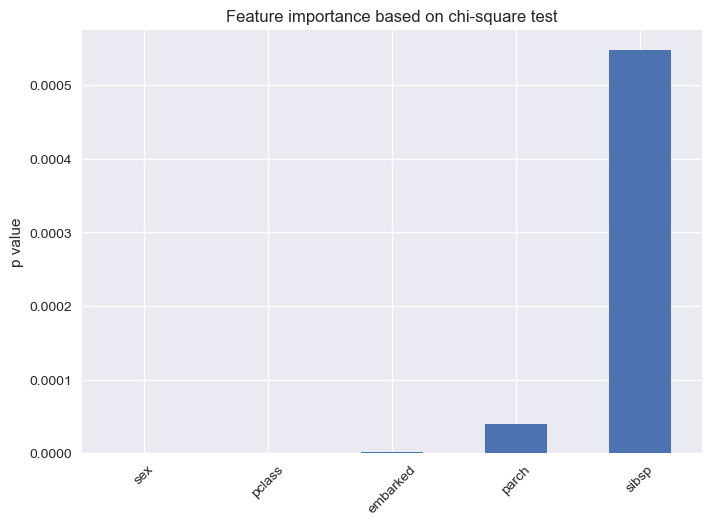

In [9]:
plt.style.use('seaborn')
pd.Series(chi_ls, index=X_train.columns).sort_values(ascending=True).plot.bar(rot=45)
plt.ylabel('p value')
plt.title('Feature importance based on chi-square test')

In [10]:
# select top 3

selected = pd.Series(chi_ls, index=X_train.columns).sort_values(
    ascending=True)[0:3].index

selected

Index(['sex', 'pclass', 'embarked'], dtype='object')

In [11]:
# sklearn returns numpy arrays. Convert to dataframe

X_train = X_train[selected]
X_test = X_test[selected]

X_train.head()

,sex,pclass,embarked
840,male,3,S
866,male,3,S
427,male,2,S
478,male,2,C
1305,male,3,S
